## Signal-to-noise for other examples
This analysis compares conserved vs. non-conserved in silico evolution for IDR2 with a number of other targets to illustrate the generalizablity of the conclusions drawn based on Rad7.

In [1]:
import numpy as np
import matplotlib
import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.25

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from sparrow import Protein
from sparrow.predictors import batch_predict

import protfasta

from finches import CALVADOS_frontend, Mpipi_frontend

mf = Mpipi_frontend()
cf = CALVADOS_frontend()
from sparrow import Protein

from shephard import interfaces, apis
from housetools import nucleic_acid_tools 
from housetools.sequence_tools.sequence_conservation import ConservationCalculator

from mutagenesis import run_mutagenesis

from tqdm import tqdm

def compare(s1,s2, verbose=True):
    count_diffs = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            count_diffs = count_diffs + 1
            if verbose:
                print(f"{i+1}: {s1[i]} vs. {s2[i]}")

    if verbose:
        print(f"{count_diffs} changes")
    return count_diffs

CC=  ConservationCalculator()

# define abf1 idr
idr2 = 'NNNNNNDGELSGTNLRSNSIDYAKHQEISSAGTSSNTTKNVNNNKNDSNDDNNGNNNNDASNLMESVLDKTSSHRYQPKKMPSVNKWSKPDQITHSDVSMVGLDESNDGGNENVHPTLAEVDAQEARETAQLAIDKINSYKRSIDDKNGDGHNNSSRNVVDENLINDMDSEDAHKSKRQHLSDITLEERNEDDKLPHEVAEQLRLLSSHLKEVE'

from scipy.stats import ks_2samp
from scipy.signal import savgol_filter

# Set rcParams for tick marks
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks (in points)
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks (in points)
plt.rcParams['xtick.major.width'] = 0.25  # Width of major ticks (in points)
plt.rcParams['xtick.minor.width'] = 0.25  # Width of minor ticks (in points)

plt.rcParams['ytick.major.size'] = 2  # Length of major ticks (in points)
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks (in points)
plt.rcParams['ytick.major.width'] = 0.25  # Width of major ticks (in points)
plt.rcParams['ytick.minor.width'] = 0.25  # Width of minor ticks (in points)

plt.rcParams['xtick.labelsize'] = 5  # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 5  # Font size for y-axis tick labels


Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


/Users/alex/.uv/neuron_uv/.venv/lib/python3.12/site-packages/finches/forcefields/calvados.py:236: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [2]:

# ..............................................................................
#
def subsample(inseqs, size=40):
    """

    Parameters
    ----------------
    inseqs : dict
        Dictionary of key-value pairs where a key is a 
        unique identifier and a value is an amino acid
        sequence.
        
    size : int
        Number of subsamples to extract from the dictionary

    Returns
    ----------------
    dict
        Returns a dictionary of size elements that have randomly
        subsampled from the inseqs dictionary without replacement.    
    """

    # check for this...
    if size > len(inseqs):
        raise Exception('Idiot.')
        
    # Randomly sample size keys from the dictionary 
    sampled_keys = random.sample(list(inseqs.keys()), size)

    # Create a new dictionary with the sampled keys and their corresponding values
    return {key: inseqs[key] for key in sampled_keys}
    

# ..............................................................................
#
def do_all_subsampling_v2(real_seq_lib, null_seq_lib, sample_size):
    """
    """

    null_vals = []
    real_vals = []
    
    
    sub_real = subsample(real_seq_lib, sample_size)
    sub_null = subsample(null_seq_lib, sample_size)
    
    sub_real['wt'] = idr2
    sub_null['wt'] = idr2
    
        
    real_vals.append(CC.calculate_conservation(sub_real, target='wt').target_scores)
    null_vals.append(CC.calculate_conservation(sub_null, target='wt').target_scores)

    return real_vals, null_vals

    



In [3]:
filenames = [['null_P14736_1_136_size_100_muts_28.fasta', 'real_P14736_1_136_size_100_muts_29.fasta'],
['null_P21576_1_120_size_100_muts_28.fasta', 'real_P21576_1_120_size_100_muts_31.fasta'],
['null_P38129_1_145_size_100_muts_28.fasta', 'real_P38129_1_145_size_100_muts_29.fasta'],
['null_P38144_674_842_size_100_muts_28.fasta', 'real_P38144_674_842_size_100_muts_30.fasta'],
['null_P40965_1_94_size_100_muts_28.fasta', 'real_P40965_1_94_size_100_muts_31.fasta'],
['null_Q08773_715_873_size_100_muts_28.fasta', 'real_Q08773_715_873_size_100_muts_31.fasta'],
['null_Q12020_1_154_size_100_muts_28.fasta', 'real_Q12020_1_154_size_100_muts_31.fasta'],
['null_Q12221_388_550_size_100_muts_28.fasta', 'real_Q12221_388_550_size_100_muts_30.fasta']]

In [ ]:

for fn in filenames:

    
    null_name = fn[0]
    real_name = fn[1]

    header = "_".join(real_name.split('_')[0:2])

    print(fn)
    new_seq_library_v2 = protfasta.read_fasta(f'out_libraries/{real_name}')
    new_seq_library_null_28 = protfasta.read_fasta(f'out_libraries/{null_name}')

    seq_len = len(list(new_seq_library_v2.items())[0][1])
    
    all_real = []
    all_null = []
    
    all_real_mean = []
    all_null_mean = []
    
    log2ratio = []
    n_rounds = 10
    n_samples = 20
    for i in range(1,n_rounds):
    
        X = do_all_subsampling_v2(new_seq_library_v2, new_seq_library_null_28, n_samples)    
        real_vals = X[0]
        null_vals = X[1]
    
        all_real.append(np.mean(real_vals,0))
        all_null.append(np.mean(null_vals,0))
    
        all_real_mean.append(np.mean(real_vals))
        all_null_mean.append(np.mean(null_vals))
    
        log2ratio.append(np.log2(np.mean(real_vals,0)/np.mean(null_vals,0)))
        
    figure(None, (2.2,1.3), dpi=450)
    indices = np.arange(1, seq_len+1)
    
    plt.plot(indices, np.mean(all_real,0), color='b',lw=0.4, label='conserved')
    plt.plot(indices, np.mean(all_null,0), color='w',lw=0.4, alpha=0.8)
    plt.plot(indices, np.mean(all_null,0), color='r',lw=0.2, label='noise',linestyle=(0, (4, 1)))
    
    mean_val = np.mean(np.array(all_null),0)
    std_val  = np.std(np.array(all_null),0)
    
    mean_val_real = np.mean(np.array(all_real),0)
    std_val_real  = np.std(np.array(all_real),0)
    
    plt.fill_between(indices,  mean_val + std_val, mean_val - std_val, color='r', alpha=0.2,lw=0)
    plt.fill_between(indices,  mean_val_real + std_val_real, mean_val_real- std_val_real, color='b', alpha=0.2,lw=0)
    
    
    plt.ylim([0.5,1.])
    plt.xlim(1,indices[-1])
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=5)
    
    plt.xlabel('IDR1 residue',fontsize=5)
    plt.ylabel('Conservation',fontsize=5)
    
    plt.legend(frameon=False, fontsize=4)
    plt.tight_layout()
    plt.savefig(f'figures/conservation_{header}.pdf')
    




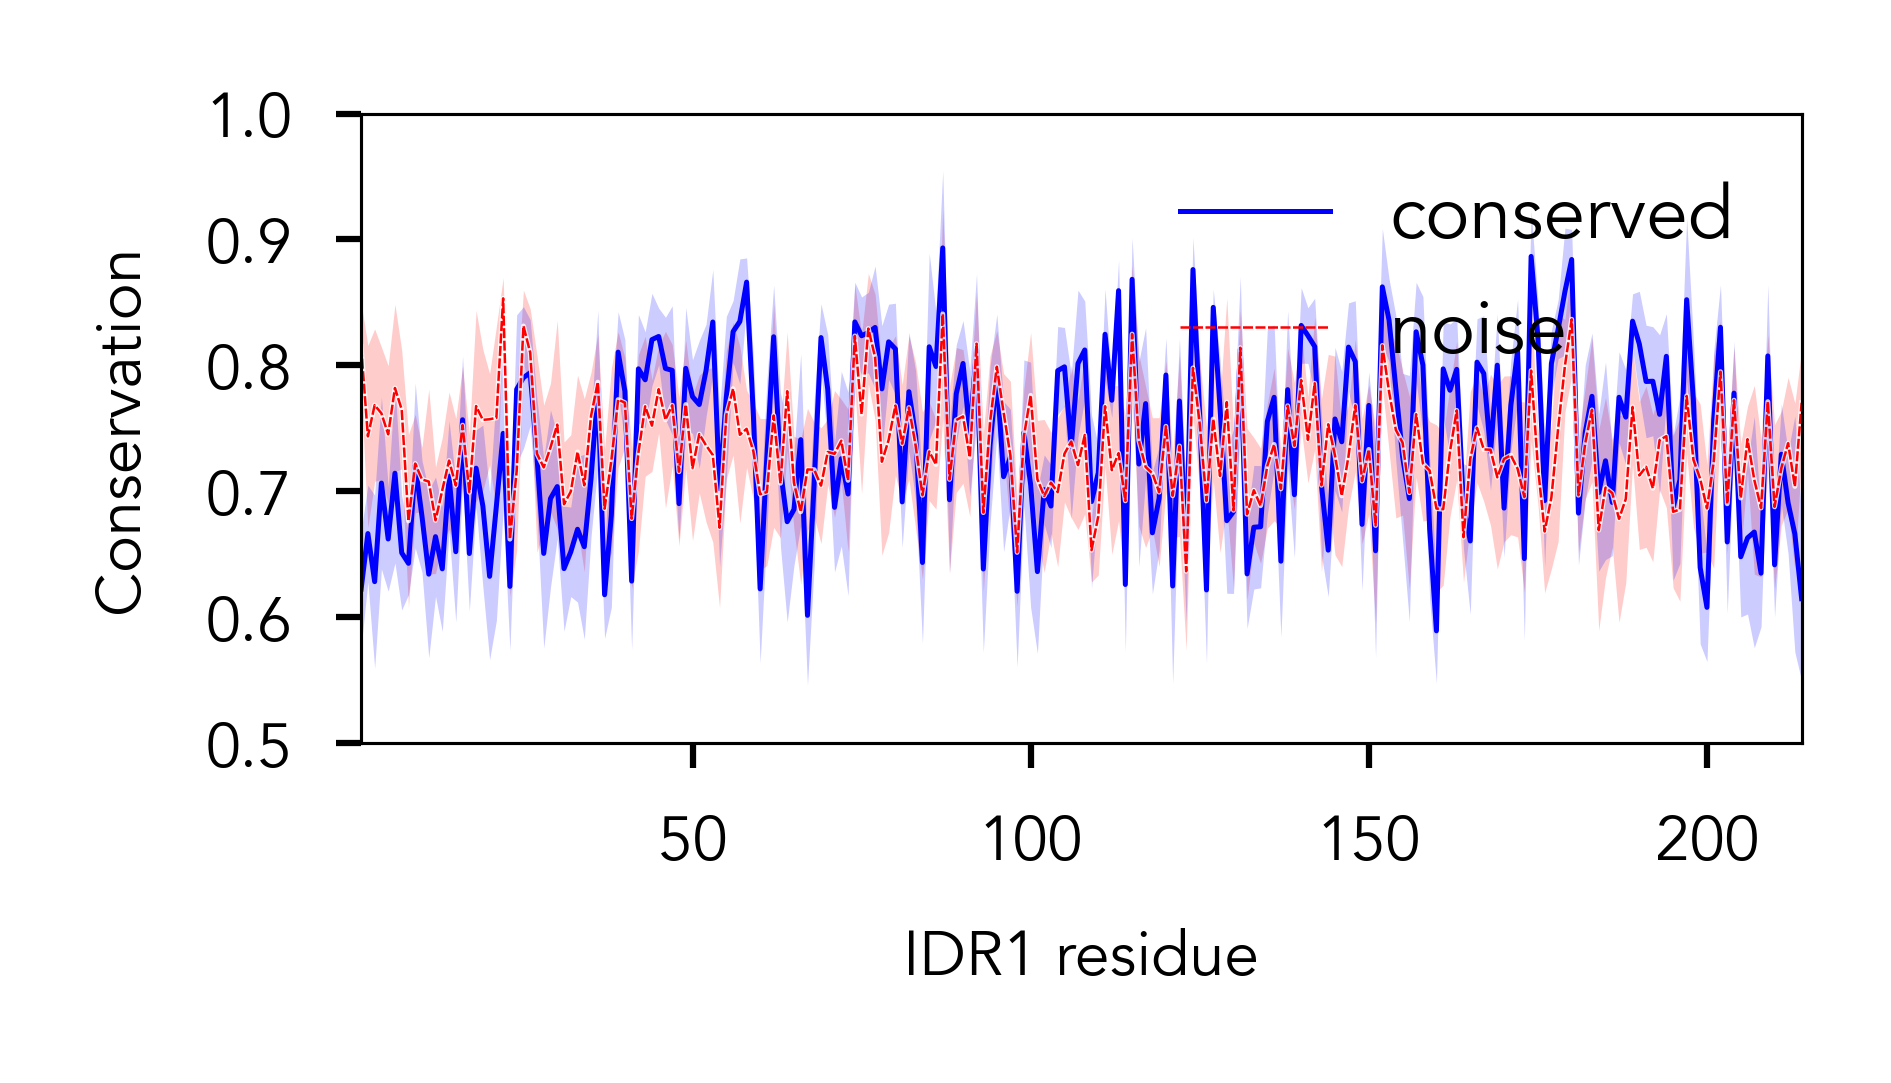